In [1]:
#Import relevant libraries
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
#from sklearn import metrics
# plt.style.use('ggplot')
# pd.set_option('display.max_columns', 200)
from scipy import stats
import os


In [2]:
df = pd.read_csv("../data/benin-malanville_clean.csv")
df.head()


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


In [3]:
# Convert Timestamp column to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
# Set Timestamp as index 
df.set_index('Timestamp', inplace=True)

<Figure size 1400x600 with 0 Axes>

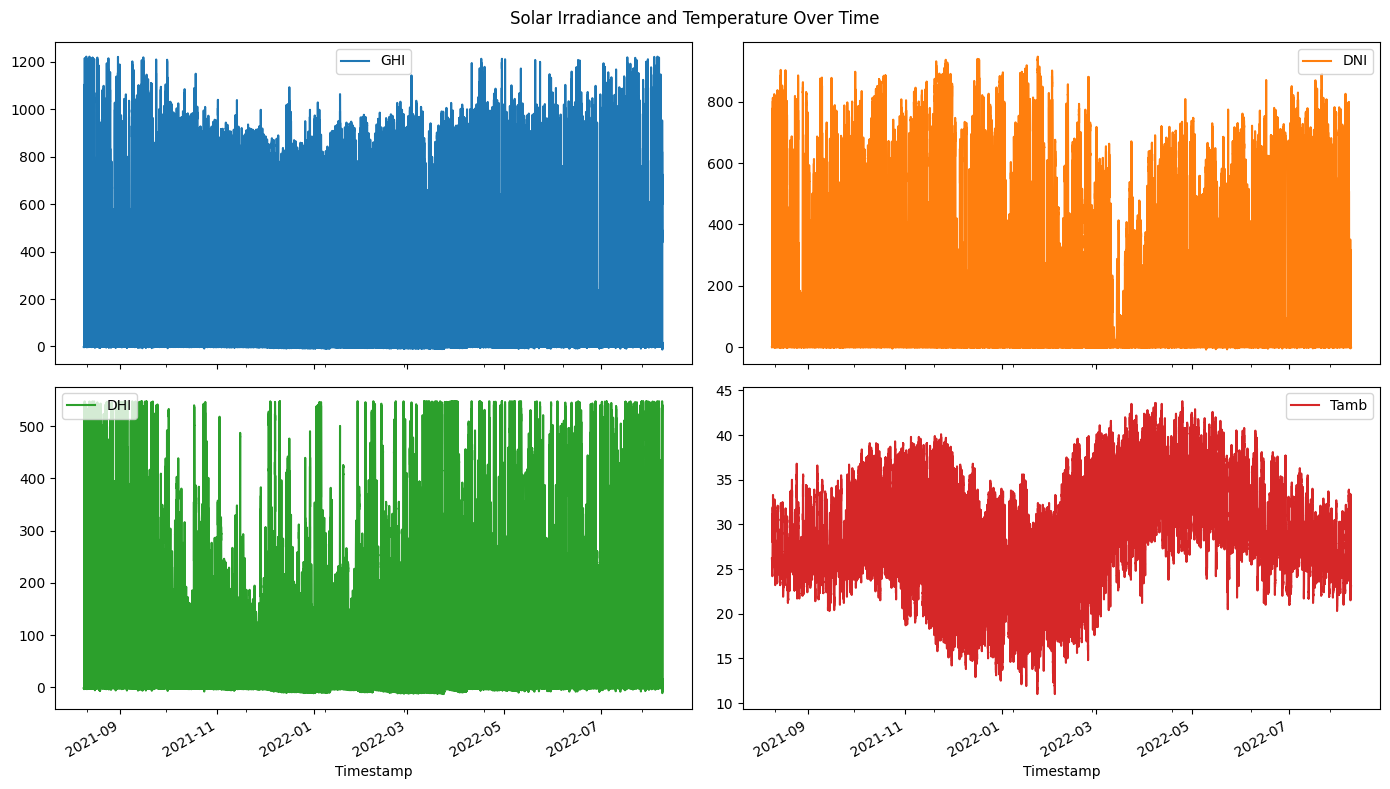

In [4]:
# Plot GHI, DNI, DHI, Tamb vs. time
plt.figure(figsize=(14, 6))
df[['GHI', 'DNI', 'DHI', 'Tamb']].plot(subplots=True, layout=(2, 2), figsize=(14, 8), title='Solar Irradiance and Temperature Over Time')
plt.tight_layout()
plt.show()

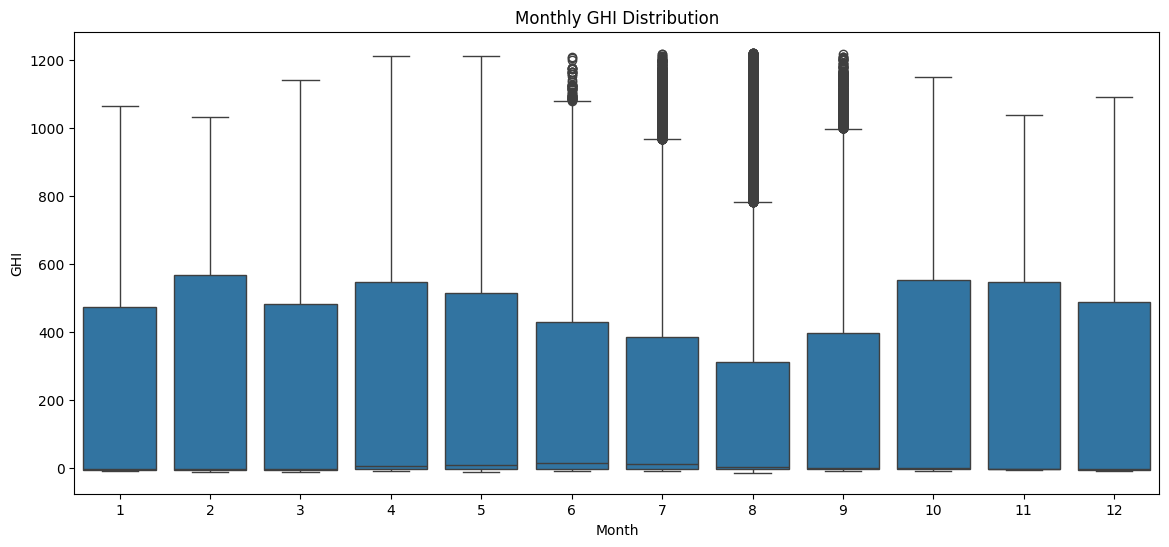

In [5]:
# Add Month and Hour columns for pattern analysis
df['Month'] = df.index.month
df['Hour'] = df.index.hour

# Monthly pattern of GHI, DNI, DHI, Tamb
plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x='Month', y='GHI')
plt.title('Monthly GHI Distribution')
plt.show()

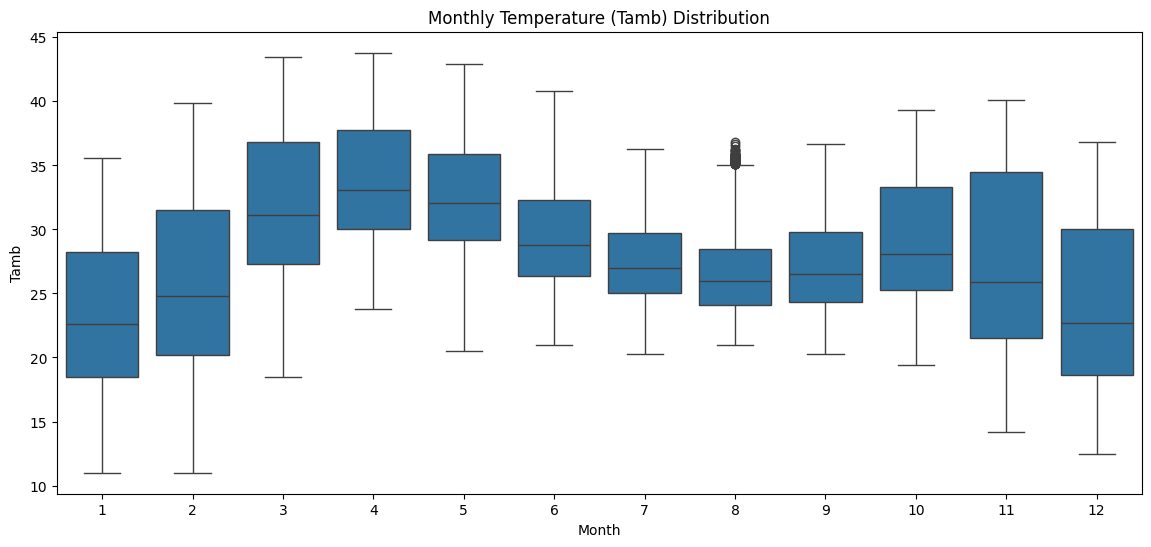

In [6]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x='Month', y='Tamb')
plt.title('Monthly Temperature (Tamb) Distribution')
plt.show()



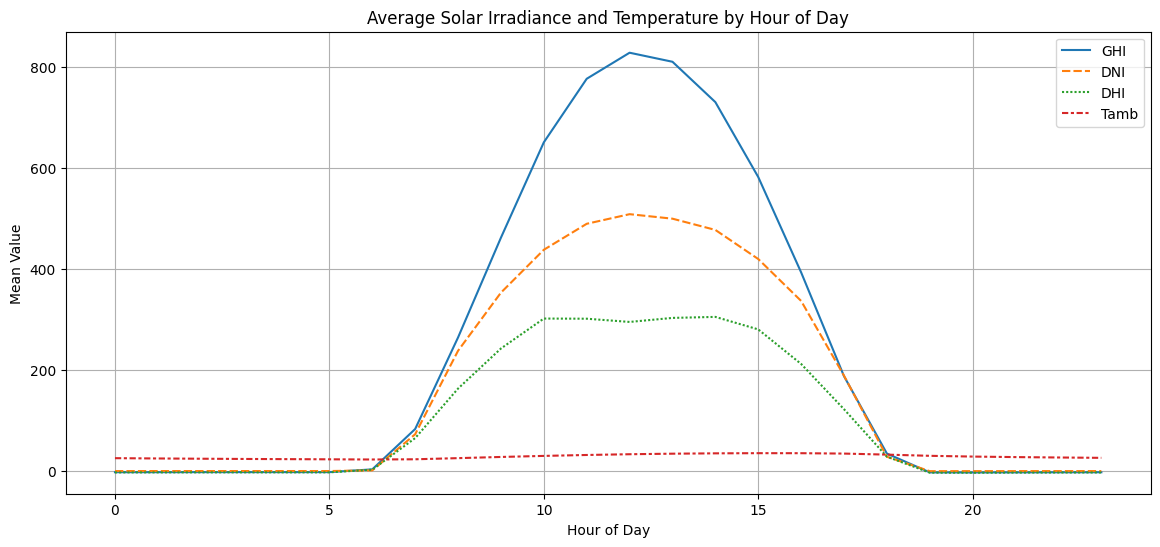

In [7]:
# Hourly trends
plt.figure(figsize=(14, 6))
sns.lineplot(data=df.groupby('Hour')[['GHI', 'DNI', 'DHI', 'Tamb']].mean())
plt.title('Average Solar Irradiance and Temperature by Hour of Day')
plt.xlabel("Hour of Day")
plt.ylabel("Mean Value")
plt.grid(True)
plt.show()

Cleaning Impact: ModA & ModB Before vs. After Cleaning

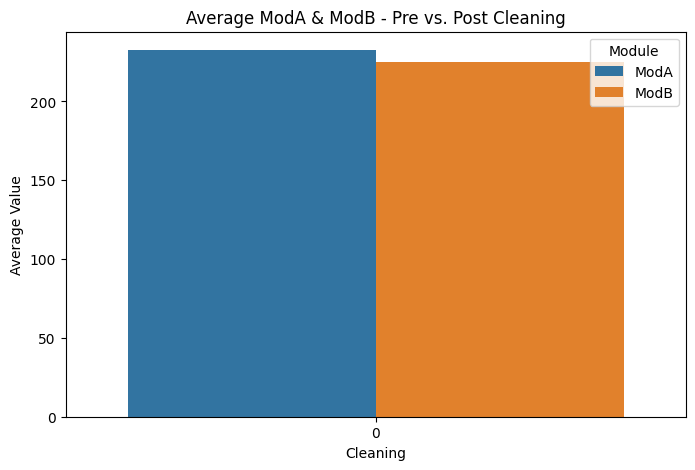

In [8]:
# If you have a cleaning flag, group by it
if 'Cleaning' in df.columns:
    grouped = df.groupby('Cleaning')[['ModA', 'ModB']].mean().reset_index()

    grouped_melted = pd.melt(grouped, id_vars='Cleaning', var_name='Module', value_name='Average Value')

    plt.figure(figsize=(8, 5))
    sns.barplot(data=grouped_melted, x='Cleaning', y='Average Value', hue='Module')
    plt.title("Average ModA & ModB - Pre vs. Post Cleaning")
    plt.show()
else:
    print("No 'Cleaning' flag found.")

Correlation & Relationship Analysis

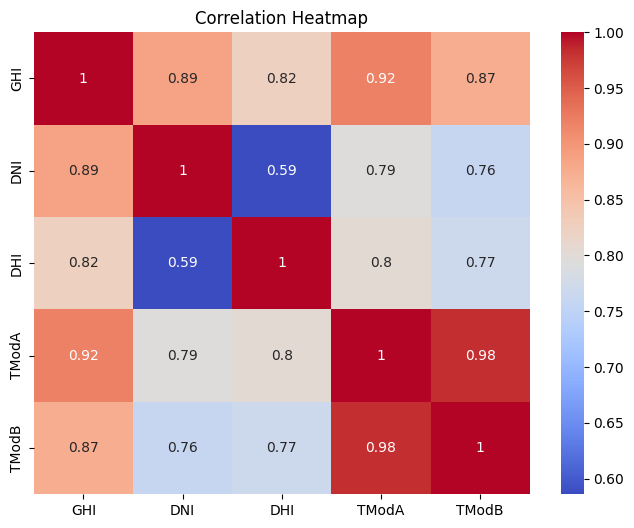

In [9]:
cols = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']
plt.figure(figsize=(8, 6))
sns.heatmap(df[cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


Scatter Plots


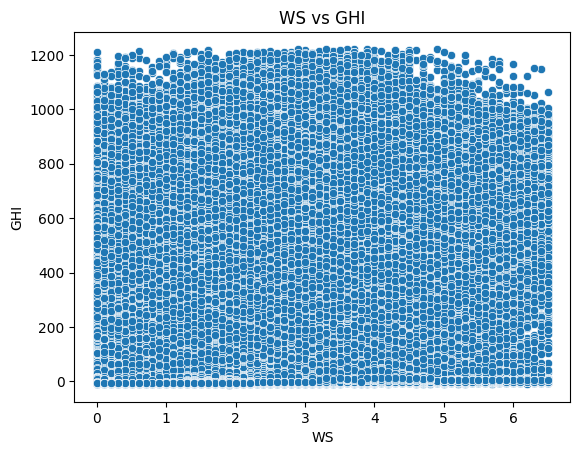

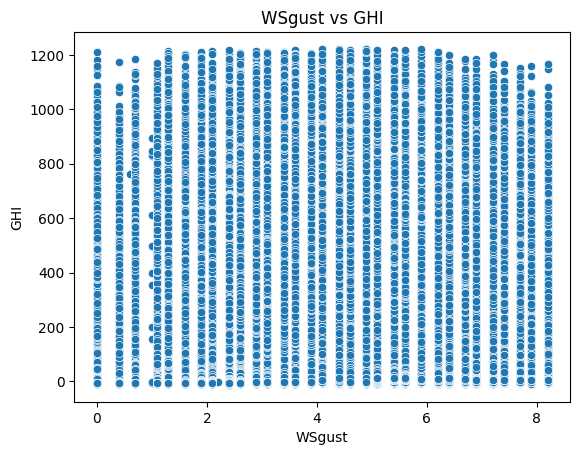

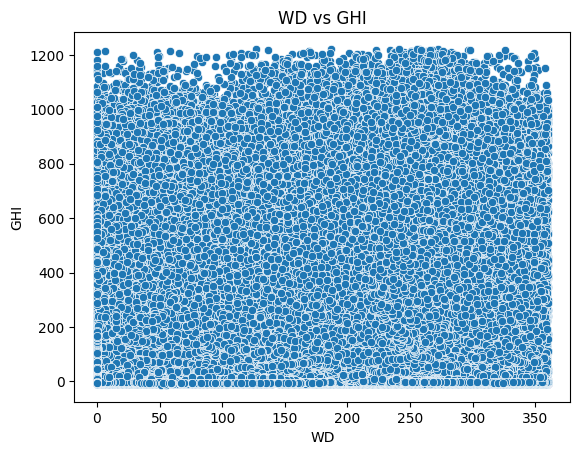

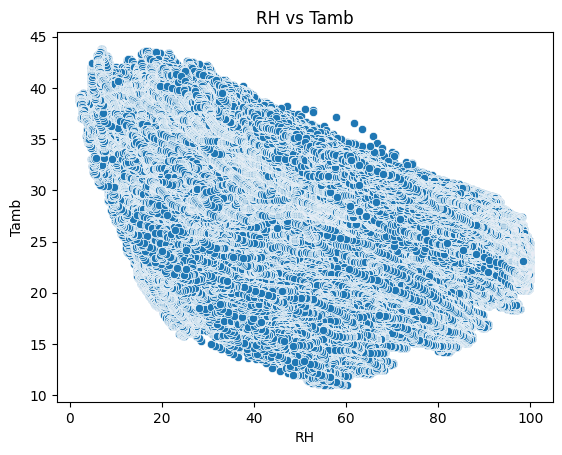

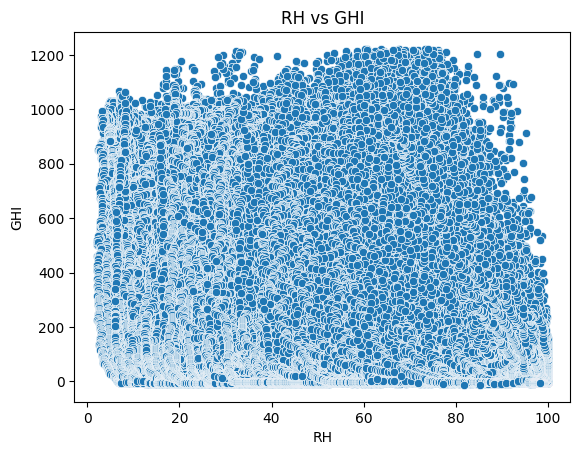

In [10]:
sns.scatterplot(data=df, x='WS', y='GHI')
plt.title('WS vs GHI')
plt.show()

sns.scatterplot(data=df, x='WSgust', y='GHI')
plt.title('WSgust vs GHI')
plt.show()

sns.scatterplot(data=df, x='WD', y='GHI')
plt.title('WD vs GHI')
plt.show()

sns.scatterplot(data=df, x='RH', y='Tamb')
plt.title('RH vs Tamb')
plt.show()

sns.scatterplot(data=df, x='RH', y='GHI')
plt.title('RH vs GHI')
plt.show()


 Wind & Distribution Analysis

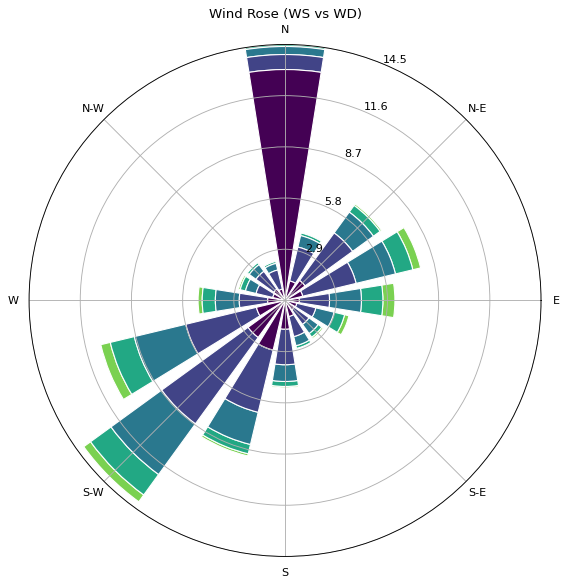

In [11]:
# pip install windrose (run this if not installed)
from windrose import WindroseAxes

ax = WindroseAxes.from_ax()
ax.bar(df['WD'], df['WS'], normed=True, opening=0.8, edgecolor='white')
ax.set_title('Wind Rose (WS vs WD)')
plt.show()


Histograms

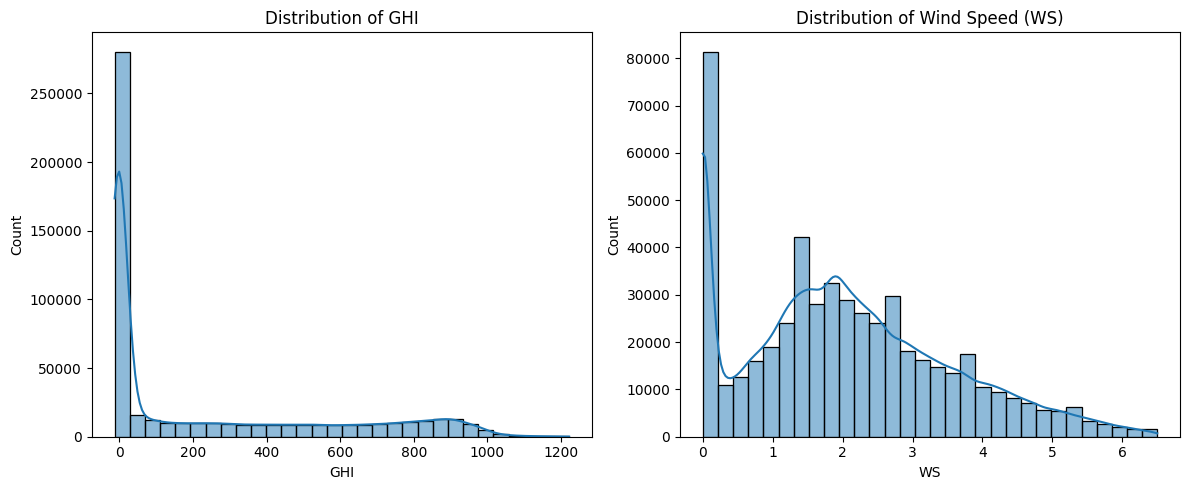

In [12]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['GHI'], bins=30, kde=True)
plt.title("Distribution of GHI")

plt.subplot(1, 2, 2)
sns.histplot(df['WS'], bins=30, kde=True)
plt.title("Distribution of Wind Speed (WS)")

plt.tight_layout()
plt.show()


Temperature Analysis: RH Influence on Tamb and GHI

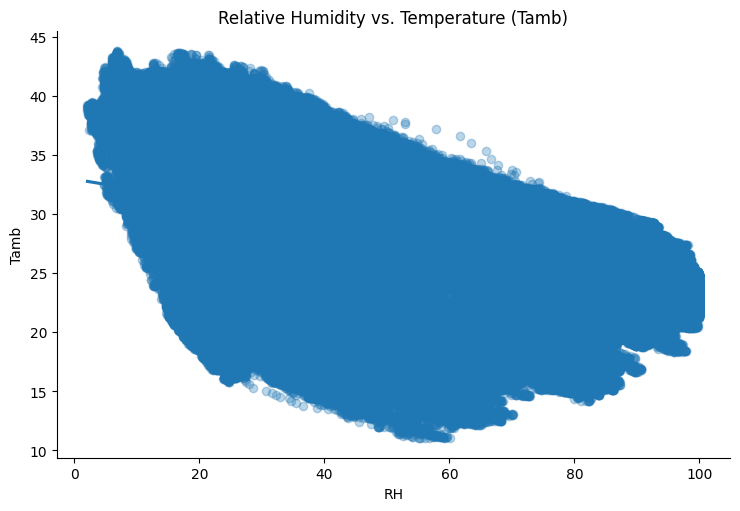

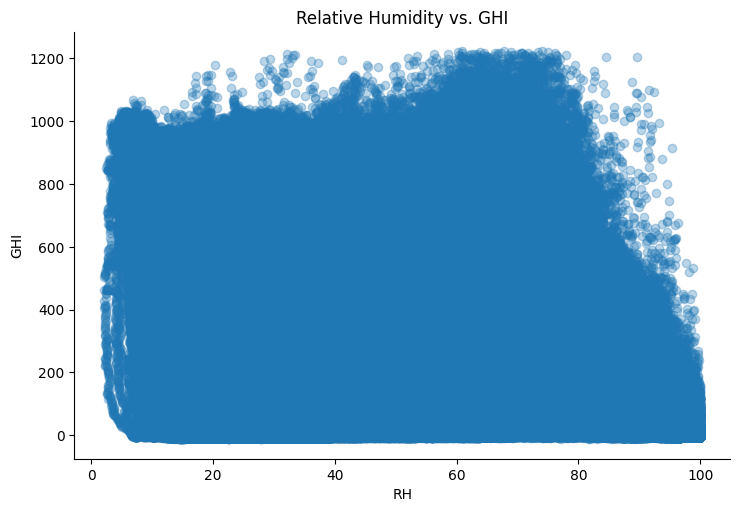

In [13]:
sns.lmplot(data=df, x='RH', y='Tamb', aspect=1.5, scatter_kws={"alpha":0.3})
plt.title("Relative Humidity vs. Temperature (Tamb)")
plt.show()

sns.lmplot(data=df, x='RH', y='GHI', aspect=1.5, scatter_kws={"alpha":0.3})
plt.title("Relative Humidity vs. GHI")
plt.show()


Bubble Chart: GHI vs. Tamb, Bubble Size = RH or BP

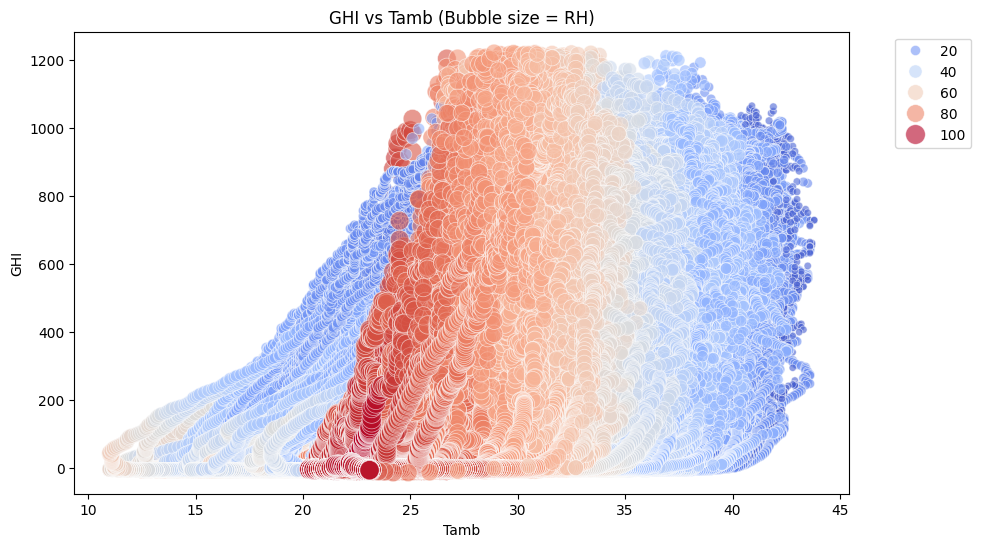

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Tamb', y='GHI', size='RH', hue='RH', palette='coolwarm', sizes=(20, 200), alpha=0.6)
plt.title('GHI vs Tamb (Bubble size = RH)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
